In [1]:
import numpy as np

## Fully-Connected Layer

### Initialize weights and bias

In [2]:
x = np.array([[1.0], [2.0]])
y_true = np.array([[1.0]])

W = np.array([[0.1, 0.2]])
b = np.array([[0.5]])

### Forward pass

In [3]:
z = W @ x + b
y_pred = 1 / (1 + np.exp(-z))

print("Output (y):\n", y_pred)

Output (y):
 [[0.73105858]]


### Calculate loss

In [4]:
# Mean squared error
loss = np.mean((y_true - y_pred) ** 2)

print("Loss (L):\n", loss)

Loss (L):
 0.07232948812851325


### Backward pass

In [ ]:
dL_dy = - 2 * (y_true - y_pred)
dy_dz = y_pred * (1 - y_pred)  # sigmoid derivative
dL_dz = dL_dy * dy_dz
dL_dW = dL_dz @ x.T
dL_db = dL_dz
dL_dx = dL_dz @ W.T

print("Gradient wrt weights (dL/dW):\n", dL_dW)
print("\nGradient wrt bias (dL/db):\n", dL_db)
print("\nGradient wrt input (dL/dx):\n", dL_dx)

Gradient wrt weights (dL/dW):
 [[-0.10575419 -0.21150837]]

Gradient wrt bias (dL/db):
 [[-0.10575419]]

Gradient wrt input (dL/dx):
 [[-0.01057542]
 [-0.02115084]]


### Update the weights and bias using the gradient

In [6]:
lr = 0.01
W -= lr * dL_dW
b -= lr * dL_db

print("Updated weights (W):\n", W)
print("Updated bias (b):\n", b)

Updated weights (W):
 [[0.10105754 0.20211508]]
Updated bias (b):
 [[0.50105754]]


### Training loop

In [ ]:
x = np.array([[1.0], [2.0]])
y_true = np.array([[1.0]])

W = np.array([[0.1, 0.2]])
b = np.array([[0.5]])

lr = 0.01

# Training loop
for epoch in range(5):
    # Forward pass
    z = x @ W + b
    y_pred = 1 / (1 + np.exp(-z))  # Sigmoid activation function
    
    # Loss (mean-squared error)
    loss = np.mean((y_true - y_pred) ** 2)

    # Backward pass
    dL_dy = - 2 * (y_true - y_pred)  # Mean-squared error derivation
    dy_dz = y_pred * (1 - y_pred)  # Sigmoid derivation
    dL_dz = dL_dy * dy_dz

    dL_dW = dL_dz @ x.T
    dL_db = dL_dz

    # Update step
    W -= lr * dL_dW
    b -= lr * dL_db
    
    print(f"Epoch {epoch+1}, Loss = {loss:.4f}")
    print("Updated W:", W, " Updated b:", b)

Epoch 1, Loss = 0.1073
Updated W: [[0.10456405 0.20384734]]  Updated b: [[0.50575205]]
Epoch 2, Loss = 0.1056
Updated W: [[0.10906857 0.20764446]]  Updated b: [[0.51143431]]
Epoch 3, Loss = 0.1040
Updated W: [[0.11351457 0.21139234]]  Updated b: [[0.51704801]]
Epoch 4, Loss = 0.1023
Updated W: [[0.11790308 0.21509192]]  Updated b: [[0.52259436]]
Epoch 5, Loss = 0.1007
Updated W: [[0.12223509 0.21874413]]  Updated b: [[0.52807453]]


## Fully-Connected Network (FCN)

### Example: FCN for point classification

In [8]:
# pip install nnfs
import nnfs
from nnfs.datasets import spiral_data

# pip install matplotlib
import matplotlib.pyplot as plt

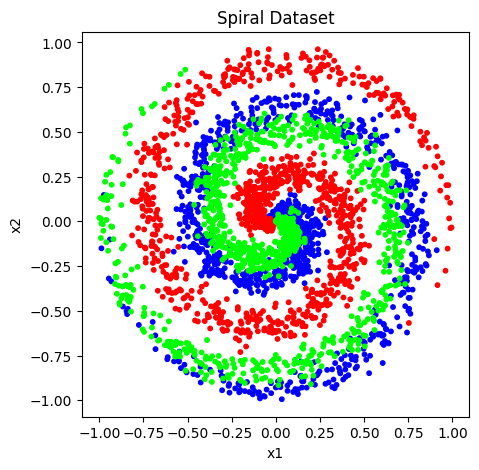

In [9]:
x_train, y_train = spiral_data(samples=1000, classes=3)

plt.figure(figsize=(5, 5))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap="brg", s=10)
plt.title("Spiral Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [10]:
# pip install torch
import torch
import torch.nn as nn
import torch.optim as optim

In [11]:
# Convert data to tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

In [ ]:
# FCN model (3 hidden layers)
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=3),
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)

    # Backward pass
    loss.backward()

    # Update the weights and biases
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss = {loss:.4f}")

Epoch 1, Loss = 1.1035
Epoch 2, Loss = 1.1160
Epoch 3, Loss = 1.0776
Epoch 4, Loss = 1.0921
Epoch 5, Loss = 1.0766
Epoch 6, Loss = 1.0696
Epoch 7, Loss = 1.0705
Epoch 8, Loss = 1.0692
Epoch 9, Loss = 1.0647
Epoch 10, Loss = 1.0601
Epoch 11, Loss = 1.0554
Epoch 12, Loss = 1.0513
Epoch 13, Loss = 1.0478
Epoch 14, Loss = 1.0436
Epoch 15, Loss = 1.0385
Epoch 16, Loss = 1.0337
Epoch 17, Loss = 1.0281
Epoch 18, Loss = 1.0227
Epoch 19, Loss = 1.0168
Epoch 20, Loss = 1.0104
Epoch 21, Loss = 1.0033
Epoch 22, Loss = 0.9963
Epoch 23, Loss = 0.9894
Epoch 24, Loss = 0.9826
Epoch 25, Loss = 0.9755
Epoch 26, Loss = 0.9682
Epoch 27, Loss = 0.9616
Epoch 28, Loss = 0.9548
Epoch 29, Loss = 0.9474
Epoch 30, Loss = 0.9394
Epoch 31, Loss = 0.9316
Epoch 32, Loss = 0.9238
Epoch 33, Loss = 0.9158
Epoch 34, Loss = 0.9090
Epoch 35, Loss = 0.9056
Epoch 36, Loss = 0.8980
Epoch 37, Loss = 0.8793
Epoch 38, Loss = 0.8757
Epoch 39, Loss = 0.8699
Epoch 40, Loss = 0.8515
Epoch 41, Loss = 0.8492
Epoch 42, Loss = 0.8408
E

### Test the model

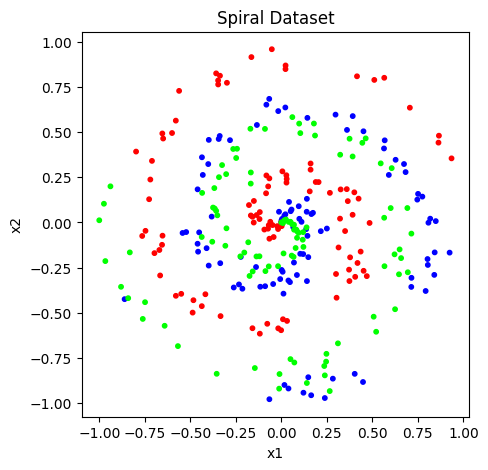

In [13]:
x_test, y_test = spiral_data(samples=100, classes=3)

plt.figure(figsize=(5, 5))
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap="brg", s=10)
plt.title("Spiral Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [14]:
# Convert data to tensors
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

with torch.no_grad():
    y_pred = model(x_test)
    pred_test = torch.argmax(y_pred, axis=1)
    test_acc = (pred_test == y_test).float().mean()

print(f"\nFinal Test Accuracy: {test_acc:.3f}")


Final Test Accuracy: 0.833


### Example: FCN for image classification

In [15]:
from torchvision import datasets, transforms

In [16]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

In [17]:
image, label = train_data[0]

print("Image shape:", image.shape)
print("Label:", label)


Image shape: torch.Size([1, 28, 28])
Label: 5


In [18]:
print(image)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

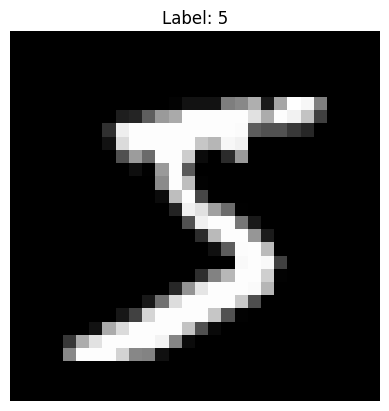

In [19]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

In [20]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=True)

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = nn.Sequential(
    nn.Linear(28*28, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.size(0), -1)

        optimizer.zero_grad()

        # Forward pass
        preds = model(images)
        loss = criterion(preds, labels)

        # Backward pass
        loss.backward()

        # Update the weights and biases
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss = {total_loss:.4f}")

Epoch 1, Loss = 16592.2960
Epoch 2, Loss = 11543.5873
Epoch 3, Loss = 10215.3016
Epoch 4, Loss = 8951.9693
Epoch 5, Loss = 8701.6863
Epoch 6, Loss = 7913.6963
Epoch 7, Loss = 7753.4780
Epoch 8, Loss = 7725.9884
Epoch 9, Loss = 7927.3069
Epoch 10, Loss = 7830.0075


## Convolutional Layer

### Initialize input, weights and bias

In [22]:
X = np.random.randint(0, 255, (28, 28))

W = np.array([
    [0.2, -0.5],
    [0.3, 0.1]
])
b = 0.0

### Forward pass

In [23]:
# Convolutional layer
kernel_size = 2
padding = 0
stride = 1

H_out, W_out = (X.shape[0] + 2 * padding - kernel_size) // stride + 1, (X.shape[1] + 2 * padding - kernel_size) // stride + 1
Z = np.zeros((H_out, W_out))
for i in range(H_out):
    for j in range(W_out):
        conv_region = X[i:i+kernel_size, j:j+kernel_size]
        Z[i, j] = np.sum(W * conv_region) + b

print("Output (Z):\n", Z)
print("\nShape after convolutional layer:", Z.shape)

Output (Z):
 [[ 4.440e+01  1.070e+01  5.880e+01 -3.040e+01 -1.000e-01  1.126e+02
   1.340e+01 -1.070e+01  1.590e+01 -7.800e+00  3.900e+00  6.250e+01
  -6.270e+01 -1.020e+01 -5.320e+01  4.100e+00 -6.000e+00 -5.100e+00
   2.100e+01  6.240e+01 -5.140e+01 -1.510e+01  5.010e+01 -5.930e+01
   3.300e+00  6.600e+00  7.950e+01]
 [ 5.670e+01 -3.960e+01 -2.270e+01 -2.630e+01 -7.610e+01 -6.400e+00
   7.560e+01  4.790e+01  5.030e+01  1.510e+01  4.650e+01 -1.930e+01
  -3.880e+01  2.720e+01  1.540e+01 -3.690e+01  2.410e+01 -2.230e+01
   4.670e+01  8.060e+01 -3.560e+01  8.430e+01 -6.640e+01  7.260e+01
  -6.000e+00 -6.900e+01 -5.900e+01]
 [-3.370e+01  7.510e+01  4.970e+01  4.930e+01  3.550e+01 -7.300e+00
   1.010e+01 -5.460e+01  6.080e+01 -2.710e+01  6.230e+01  5.500e+00
   6.600e+00  8.780e+01  2.430e+01  5.800e+01 -1.026e+02 -3.620e+01
  -4.530e+01  1.117e+02 -2.700e+00  4.780e+01 -7.500e+00  1.083e+02
   4.100e+01  4.320e+01  1.180e+01]
 [-3.100e+00 -2.970e+01  3.120e+01 -3.080e+01 -5.050e+01  5.830

In [24]:
# Activation function (ReLU)
A = np.maximum(0, Z)
print("Output after ReLU (Z):\n", A)
print("\nShape after ReLU:", A.shape)

Output after ReLU (Z):
 [[ 44.4  10.7  58.8   0.    0.  112.6  13.4   0.   15.9   0.    3.9  62.5
    0.    0.    0.    4.1   0.    0.   21.   62.4   0.    0.   50.1   0.
    3.3   6.6  79.5]
 [ 56.7   0.    0.    0.    0.    0.   75.6  47.9  50.3  15.1  46.5   0.
    0.   27.2  15.4   0.   24.1   0.   46.7  80.6   0.   84.3   0.   72.6
    0.    0.    0. ]
 [  0.   75.1  49.7  49.3  35.5   0.   10.1   0.   60.8   0.   62.3   5.5
    6.6  87.8  24.3  58.    0.    0.    0.  111.7   0.   47.8   0.  108.3
   41.   43.2  11.8]
 [  0.    0.   31.2   0.    0.   58.3  45.6  38.7   0.    7.7  13.6   0.
    0.    0.   34.6  91.4  49.4   0.5  19.1   4.9  30.4  64.4   0.    0.
   85.5   0.   56.4]
 [  0.    1.8  99.4  49.3  38.7   0.    0.   75.7  90.   51.2  33.5  79.2
    0.   14.4   0.    0.   72.9   0.    0.   33.6  10.6   0.    2.8   7.5
    0.   61.    0. ]
 [  0.    0.    0.   26.7  77.9  61.9   0.    0.    0.   65.3   0.   53.
    0.   60.7  82.5   0.    2.8  49.6  11.1   0.    0.   53.2 

In [25]:
# MaxPool 2x2 layer
pool_size = 2
pool_stride = 2
H_out, W_out = (A.shape[0] - pool_size) // pool_stride + 1, (A.shape[1] - pool_size) // pool_stride + 1

P = np.zeros((H_out, W_out))
for i in range(H_out):
    for j in range(W_out):
        pool_region = A[i*pool_stride:i*pool_stride+pool_size, j*pool_stride:j*pool_stride+pool_size]
        P[i,j] = np.max(pool_region)
        
print("Output after max-pooling layer (P):\n", P)
print("\nShape after max-pooling layer:", P.shape)

Output after max-pooling layer (P):
 [[ 56.7  58.8 112.6  75.6  50.3  62.5  27.2  15.4  24.1  80.6  84.3  72.6
    6.6]
 [ 75.1  49.7  58.3  45.6  60.8  62.3  87.8  91.4  49.4 111.7  64.4 108.3
   85.5]
 [  1.8  99.4  77.9  75.7  90.   79.2  60.7  82.5  72.9  33.6  53.2  65.5
   61. ]
 [ 85.2  36.6  64.5  91.3  56.1 101.7  19.4  95.8  91.7  35.6  67.   15.4
   94. ]
 [ 68.5 107.   49.2  22.2 101.    5.2  19.3  81.9  56.   70.4   8.8  50.3
  110.5]
 [ 56.7  74.   92.2  59.   27.6  99.6  64.2  59.6  25.9  55.6  82.6   0.
  107.6]
 [ 99.1  58.6  43.8  40.3  51.8 100.2  69.9  67.9  50.5  64.8 102.2  36.8
   66.3]
 [ 47.3  81.6  56.8  60.1  93.3  41.9  19.3  92.6  65.9  40.6  14.2  70.3
   90.6]
 [ 95.3  39.   33.4  60.8  26.   87.9  42.5  21.2  73.9 102.8  46.7  66.9
   95.5]
 [ 13.4  35.5  85.6  53.3  63.3 113.3  39.8  22.5  89.   51.6  15.7  58.4
   47. ]
 [ 60.1  10.1  54.1  81.7  42.6  36.2  26.8  60.3  49.3  79.1  81.2  38.2
   54.1]
 [ 71.2 112.5  29.4  55.1  37.3  29.8  86.3  56.   

### CNN for image classification


In [26]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root="./data", train=True, download=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=True)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: torch.Size([3000, 2])
y_train shape: torch.Size([3000])


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flattening
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x

In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()

        # Forward pass
        preds = model(images)
        loss = criterion(preds, labels)

        # Backward pass
        loss.backward()

        # Update the weights and biases
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss = {total_loss:.4f}")

Epoch 1, Loss = 7259.8032
Epoch 2, Loss = 3665.3226
Epoch 3, Loss = 3125.3977
Epoch 4, Loss = 2748.4966
Epoch 5, Loss = 2593.4279
Epoch 6, Loss = 2702.0485
Epoch 7, Loss = 2404.9604
Epoch 8, Loss = 2157.6500
Epoch 9, Loss = 2135.8587
Epoch 10, Loss = 2231.9533


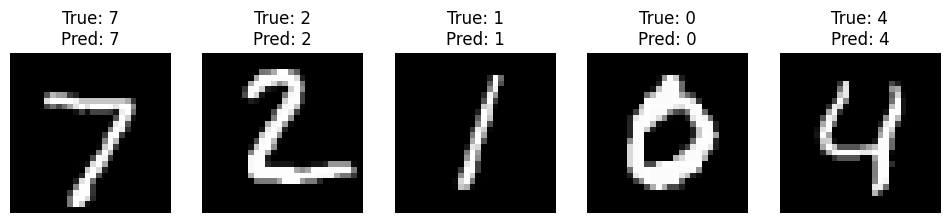

In [29]:
test_data = datasets.MNIST(root="./data", train=False, download=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=5, shuffle=False)


model.eval()

# Get the first 5 test images and labels
images, labels = next(iter(test_loader))

images = images.to(device)
labels = labels.to(device)

# Get predictions
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].cpu().squeeze(), cmap="gray")
    plt.title(f"True: {labels[i].item()}\nPred: {preds[i].item()}")
    plt.axis("off")

plt.show()